<h1>Data cleaning</h1>
<p>I created a list with what needed doing in regards to data cleaning:</p>
<ol>
  <li>Examine the data to find any problems:
    <ul>
      <li>Missing data heatmap</li>
    </ul>
  </li>
  <li>Find missing data and add default values if required</li>
  <li>Remove any incomplete columns or rows</li>
  <li>Remove any unneccessary data:
    <ul>
      <li>Uninformative</li>
      <li>Repetative</li>
      <li>Duplicates</li>
    </ul>
  </li>
  <li>Normalise data types, e.g. strings <-> int</li>
  <li>Change casing, remove whitespace</li>
  <li>Rename columns if required</li>
  <li>Save the data as a new file</li>
</ol>


<h3>Before starting on cleaning, we needed to install various packages to be able to access the data and clean it.</h3>

In [2]:
# Import pandas for loading data and exploration
import pandas as pd
# Installing the seaborn library from Matplotlib for visualisations
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [3]:
path = '../Project/Learner_Employee_Sample_Data.csv'
# Reading the data from the csv file
df_employees = pd.read_csv(path)

<h2>Step 1</h2>
<ul>
  <li>Examine the data to find any problems:
      <ul>
        <li>Missing data heatmap</li>
        <li>Irregular data bar chart</li>
      </ul>
  </li>
</ul>
<p>I printed the data's shape, to understand the size of it. I then printed both the head and tail. I discovered that there was no order to the data, so reordered by Country, followed by City, Department and finally Job Title. I used both info and describe functions to give us a quick visulisation of the different columns.</p>
  

In [4]:
# Printing the data shape
df_employees.shape

(1003, 16)

In [5]:
# Printing the data head (first 5 rows)
df_employees.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Unnamed: 14,Unnamed: 15
0,E00005,Riley Washington,Director,Sales,Speciality Products,Female,Caucasian,39,4/29/2007,"$171,487",23%,United States,Phoenix,NaN,NaN,NaN
1,E00013,Elena Vang,Analyst,Finance,Corporate,Female,Asian,52,2/19/2019,"$55,859",0%,China,Beijing,NaN,NaN,NaN
2,E00013,Raelynn Ma,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,10/08/2015,"$94,876",0%,United States,Miami,NaN,NaN,NaN
3,E00022,Elena Her,Account Representative,Sales,Manufacturing,Female,Asian,62,9/17/2006,"$64,669",0%,China,Chongqing,NaN,NaN,NaN
4,E00023,Gabriel Joseph,Director,Engineering,Manufacturing,Male,Caucasian,52,10/28/2006,"$187,992",28%,United States,Miami,NaN,NaN,NaN


In [6]:
# Printing the data tail (last 5 rows)
df_employees.tail()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Unnamed: 14,Unnamed: 15
998,E04972,Ivy Daniels,Sr. Manger,Human Resources,Speciality Products,Female,Caucasian,41,10/26/2008,"$131,841",13%,United States,Columbus,NaN,NaN,NaN
999,E04972,Logan Bryant,Sr. Manger,Marketing,Speciality Products,Male,Caucasian,30,7/18/2020,"$148,485",15%,United States,Miami,NaN,NaN,NaN
1000,E04972,Sophie Oh,Network Engineer,IT,Corporate,Female,Asian,29,11/09/2017,"$63,985",0%,United States,Miami,NaN,NaN,NaN
1001,E04978,Peyton Harris,Enterprise Architect,IT,Research & Development,Female,Caucasian,45,04/05/2009,"$64,505",0%,United States,Miami,NaN,NaN,NaN
1002,E04994,Bella Holmes,Director,Accounting,Research & Development,Female,Caucasian,35,6/26/2017,"$161,269",27%,United States,Miami,NaN,NaN,NaN


In [7]:
df_employees.info()
# Gives us a quick visualisation of the data types of each column
df_employees.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EEID           1003 non-null   object 
 1   Full Name      1003 non-null   object 
 2   Job Title      1003 non-null   object 
 3   Department     1003 non-null   object 
 4   Business Unit  1003 non-null   object 
 5   Gender         1003 non-null   object 
 6   Ethnicity      1003 non-null   object 
 7   Age            1003 non-null   int64  
 8   Hire Date      1003 non-null   object 
 9   Annual Salary  1003 non-null   object 
 10  Bonus %        1003 non-null   object 
 11  Country        1003 non-null   object 
 12  City           1003 non-null   object 
 13  Exit Date      85 non-null     object 
 14  Unnamed: 14    0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
dtypes: float64(2), int64(1), object(13)
memory usage: 125.5+ KB


,Age,Unnamed: 14,Unnamed: 15
count,1003.000000,0.0,0.0
mean,44.378863,NaN,NaN
std,11.262076,NaN,NaN
min,25.000000,NaN,NaN
25%,35.000000,NaN,NaN
50%,45.000000,NaN,NaN
75%,54.000000,NaN,NaN
max,65.000000,NaN,NaN


<p>From this analysis of the data in it's current state, I can clearly see that in Exit Date and the two Unnamed columns there are currently NaN values. I will address these later on in the cleaning process. I can also see that both Annual Salary and Bonus % datatypes are objects, whereas they can be made int64 for easier analysis.</p>

In [8]:
# Sorting the data so it is ordered by Country, followed by City, Department and finally Job Title.

df_employees = df_employees.sort_values(by=['Country', 'City', 'Department', 'Job Title'])
df_employees

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Unnamed: 14,Unnamed: 15
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,"$50,857",0%,Brazil,Manaus,NaN,NaN,NaN
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,"$109,812",9%,Brazil,Manaus,NaN,NaN,NaN
104,E00502,Natalia Salazar,Sr. Analyst,Accounting,Manufacturing,Female,Latino,44,01/02/2019,"$74,691",0%,Brazil,Manaus,07/08/2020,NaN,NaN
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,"$113,987",0%,Brazil,Manaus,NaN,NaN,NaN
80,E00416,Everleigh Fernandez,Director,Engineering,Research & Development,Female,Latino,30,5/22/2016,"$189,702",28%,Brazil,Manaus,12/21/2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,E03423,Santiago f Gonzalez,Manager,Sales,Research & Development,Male,Latino,36,7/26/2012,"$105,891",7%,United States,Seattle,NaN,NaN,NaN
362,E01807,Matthew Lim,Sr. Analyst,Sales,Research & Development,Male,Asian,52,2/18/1994,"$99,624",0%,United States,Seattle,NaN,NaN,NaN
405,E02024,Amelia Bell,Sr. Analyst,Sales,Manufacturing,Female,Caucasian,53,08/05/2017,"$89,769",0%,United States,Seattle,NaN,NaN,NaN
606,E03027,Elijah Watson,Sr. Manger,Sales,Manufacturing,Male,Caucasian,29,3/16/2017,"$151,413",15%,United States,Seattle,NaN,NaN,NaN


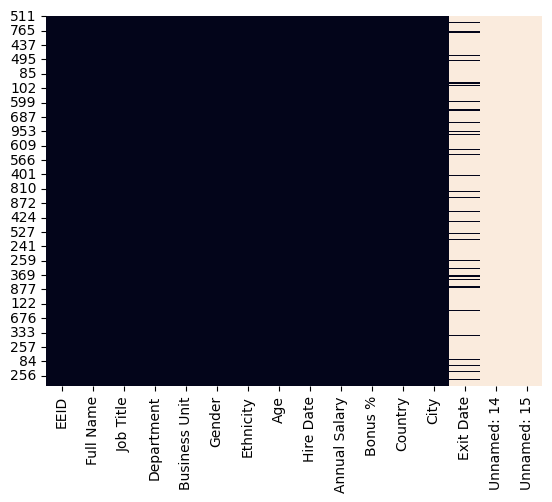

In [9]:
# Missing data heatmap - get the visualisation of which data is missing
sns.heatmap(df_employees.isnull(), cbar=False)
plt.show()

<p>From the heatmap, I can see that there is missing data for 'Exit Date' and the two 'Unnamed' columns. I have decided to remove the rows that contain data in the 'Exit Date' column, as this data will not be important to the analysis as the employees have left the company. I will also remove the two 'Unnamed' columns as well as they are irrelevant to the analysis.</p>

<h2>Step 2</h2>
<ul>
  <li>Find missing data and add default values if required</li>
</ul>

<p>As shown in the heatmap, the columns which have missing data are 'Exit Date' and the two 'Unnamed' columns. As they are irrelevant to the analysis, I am not going to enter any default values as I will be removing them shortly.</p>

<h2>Step 3</h2>
<ul>
  <li>Remove any incomplete columns or rows</li>
</ul>
<p>Here I decided to remove the 'Exit Date' and the two 'Unnamed' columns, as they have NaN data and are not relevant to the analysis I know I am going to complete.</p>
<p>Rather than remove the column 'Exit Date', I will remove any rows that have that data in, as the entire row connected to the data in that column is irrelevant for our analysis, not just that column.</p>

In [10]:
# Dropping columns 'Unnamed'
df_employees_cleaned = df_employees

df_employees_cleaned = df_employees_cleaned.drop(['Unnamed: 14'], axis=1)

df_employees_cleaned = df_employees_cleaned.drop(['Unnamed: 15'], axis=1)

df_employees_cleaned.head(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,"$50,857",0%,Brazil,Manaus,NaN
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,"$109,812",9%,Brazil,Manaus,NaN
104,E00502,Natalia Salazar,Sr. Analyst,Accounting,Manufacturing,Female,Latino,44,01/02/2019,"$74,691",0%,Brazil,Manaus,07/08/2020
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,"$113,987",0%,Brazil,Manaus,NaN
80,E00416,Everleigh Fernandez,Director,Engineering,Research & Development,Female,Latino,30,5/22/2016,"$189,702",28%,Brazil,Manaus,12/21/2020


In [11]:
df_employees_cleaned.shape

(1003, 14)

In [12]:
df_employees_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 511 to 904
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           1003 non-null   object
 1   Full Name      1003 non-null   object
 2   Job Title      1003 non-null   object
 3   Department     1003 non-null   object
 4   Business Unit  1003 non-null   object
 5   Gender         1003 non-null   object
 6   Ethnicity      1003 non-null   object
 7   Age            1003 non-null   int64 
 8   Hire Date      1003 non-null   object
 9   Annual Salary  1003 non-null   object
 10  Bonus %        1003 non-null   object
 11  Country        1003 non-null   object
 12  City           1003 non-null   object
 13  Exit Date      85 non-null     object
dtypes: int64(1), object(13)
memory usage: 117.5+ KB


<p>Rather than deleting the rows, I decided to create a new dataframe which did not include the data for the rows with an data entry in 'Exit Date'.</p>

In [13]:
# To start with I created a new dataframe and then changed the NaN values in 'Exit Date' to 0 as this would make it easier.
df_employees_current = df_employees_cleaned
df_employees_current['Exit Date'] = df_employees_current['Exit Date'].fillna(0)

In [14]:
df_employees_current.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 511 to 904
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           1003 non-null   object
 1   Full Name      1003 non-null   object
 2   Job Title      1003 non-null   object
 3   Department     1003 non-null   object
 4   Business Unit  1003 non-null   object
 5   Gender         1003 non-null   object
 6   Ethnicity      1003 non-null   object
 7   Age            1003 non-null   int64 
 8   Hire Date      1003 non-null   object
 9   Annual Salary  1003 non-null   object
 10  Bonus %        1003 non-null   object
 11  Country        1003 non-null   object
 12  City           1003 non-null   object
 13  Exit Date      1003 non-null   object
dtypes: int64(1), object(13)
memory usage: 117.5+ KB


In [15]:
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,"$50,857",0%,Brazil,Manaus,0
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,"$109,812",9%,Brazil,Manaus,0
104,E00502,Natalia Salazar,Sr. Analyst,Accounting,Manufacturing,Female,Latino,44,01/02/2019,"$74,691",0%,Brazil,Manaus,07/08/2020
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,"$113,987",0%,Brazil,Manaus,0
80,E00416,Everleigh Fernandez,Director,Engineering,Research & Development,Female,Latino,30,5/22/2016,"$189,702",28%,Brazil,Manaus,12/21/2020


In [16]:
# I then chose the data which had a 0 in 'Exit Date'

df_employees_current = df_employees_current[df_employees_current['Exit Date'] == 0]

# And redid the head to check the changes
df_employees_current.head()


,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,"$50,857",0%,Brazil,Manaus,0
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,"$109,812",9%,Brazil,Manaus,0
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,"$113,987",0%,Brazil,Manaus,0
264,E01271,Luke Munoz,Director,Engineering,Speciality Products,Male,Latino,64,8/25/2017,"$169,509",18%,Brazil,Manaus,0
524,E02693,Grace Campos,Director,Engineering,Research & Development,Female,Latino,37,3/21/2008,"$156,277",22%,Brazil,Manaus,0


<p>I then redid the heatmap and .info so that I could see the changes visually.</p>

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 511 to 904
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           918 non-null    object
 1   Full Name      918 non-null    object
 2   Job Title      918 non-null    object
 3   Department     918 non-null    object
 4   Business Unit  918 non-null    object
 5   Gender         918 non-null    object
 6   Ethnicity      918 non-null    object
 7   Age            918 non-null    int64 
 8   Hire Date      918 non-null    object
 9   Annual Salary  918 non-null    object
 10  Bonus %        918 non-null    object
 11  Country        918 non-null    object
 12  City           918 non-null    object
 13  Exit Date      918 non-null    object
dtypes: int64(1), object(13)
memory usage: 107.6+ KB
None


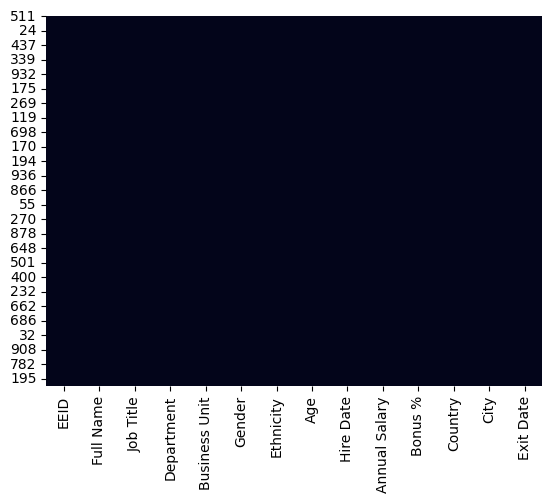

In [17]:
print(df_employees_current.info())
# Missing data heatmap - get the visualisation of which data is missing, if any is
sns.heatmap(df_employees_current.isnull(), cbar=False)
plt.show()

<p>I still don't need the 'Exit Date' column, so next I will remove it completely.</p>

In [18]:
df_employees_current = df_employees_current.drop(['Exit Date'], axis=1)

In [19]:
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,"$50,857",0%,Brazil,Manaus
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,"$109,812",9%,Brazil,Manaus
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,"$113,987",0%,Brazil,Manaus
264,E01271,Luke Munoz,Director,Engineering,Speciality Products,Male,Latino,64,8/25/2017,"$169,509",18%,Brazil,Manaus
524,E02693,Grace Campos,Director,Engineering,Research & Development,Female,Latino,37,3/21/2008,"$156,277",22%,Brazil,Manaus


<h2>Step 4</h2>
<ul>
  <li>Remove any unneccessary data:
    <ul>
      <li>Uninformative</li>
      <li>Repetative</li>
      <li>Duplicates</li>
    </ul>
  </li>
</ul>

<p>I don't want any duplicates in the data, so have used the following code to remove any.</p>

In [20]:
# Checked the shape first
df_employees_current.shape

(918, 13)

In [21]:
# Found out how many rows had duplicates
df_employees_current.duplicated().sum()

np.int64(3)

In [22]:
# To show the duplicate data, keep=False shows the all the duplicates, including the first occurance of that data. 
# This is to check it has correctly found duplicates.
df_employees_current.loc[df_employees_current.duplicated(keep=False), :]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
714,E03549,Mateo Vu,Account Representative,Sales,Speciality Products,Male,Asian,30,9/29/2016,"$59,100",0%,China,Chongqing
715,E03549,Mateo Vu,Account Representative,Sales,Speciality Products,Male,Asian,30,9/29/2016,"$59,100",0%,China,Chongqing
874,E04285,Riley Padilla,Technical Architect,IT,Manufacturing,Female,Latino,35,5/15/2013,"$78,940",0%,United States,Miami
875,E04285,Riley Padilla,Technical Architect,IT,Manufacturing,Female,Latino,35,5/15/2013,"$78,940",0%,United States,Miami
30,E00163,Bella Powell,Director,Finance,Research & Development,Female,Black,65,03/04/2002,"$175,837",20%,United States,Phoenix
31,E00163,Bella Powell,Director,Finance,Research & Development,Female,Black,65,03/04/2002,"$175,837",20%,United States,Phoenix


In [23]:
# To show just the duplicates, we change keep to equal 'first'
df_employees_current.loc[df_employees_current.duplicated(keep='first'), :]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
715,E03549,Mateo Vu,Account Representative,Sales,Speciality Products,Male,Asian,30,9/29/2016,"$59,100",0%,China,Chongqing
875,E04285,Riley Padilla,Technical Architect,IT,Manufacturing,Female,Latino,35,5/15/2013,"$78,940",0%,United States,Miami
31,E00163,Bella Powell,Director,Finance,Research & Development,Female,Black,65,03/04/2002,"$175,837",20%,United States,Phoenix


In [24]:
# Removing the duplicates
df_employees_current = df_employees_current.drop_duplicates(keep='first')

In [25]:
# Checked the shape again
df_employees_current.shape

(915, 13)

In [26]:
# Checked to see if there were any duplicates left
df_employees_current.loc[df_employees_current.duplicated(keep=False), :]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City


<h2>Step 5</h2>
<ul>
  <li>Normalise data types, e.g. strings <-> int</li>
</ul>

In [27]:
df_employees_current.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 511 to 904
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           915 non-null    object
 1   Full Name      915 non-null    object
 2   Job Title      915 non-null    object
 3   Department     915 non-null    object
 4   Business Unit  915 non-null    object
 5   Gender         915 non-null    object
 6   Ethnicity      915 non-null    object
 7   Age            915 non-null    int64 
 8   Hire Date      915 non-null    object
 9   Annual Salary  915 non-null    object
 10  Bonus %        915 non-null    object
 11  Country        915 non-null    object
 12  City           915 non-null    object
dtypes: int64(1), object(12)
memory usage: 100.1+ KB


<p>From this quick overview, I want to make sure that there are strings and integers where required. There are two that need changing, 'Annual Salary' and 'Bonus %'. Currently they are objects, but I would like them to be integers.</p>

In [28]:
# I want to remind myself how they appear in the dataframe
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,"$50,857",0%,Brazil,Manaus
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,"$109,812",9%,Brazil,Manaus
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,"$113,987",0%,Brazil,Manaus
264,E01271,Luke Munoz,Director,Engineering,Speciality Products,Male,Latino,64,8/25/2017,"$169,509",18%,Brazil,Manaus
524,E02693,Grace Campos,Director,Engineering,Research & Development,Female,Latino,37,3/21/2008,"$156,277",22%,Brazil,Manaus


In [29]:
# I need to remove the '$' and '%' from the columns to be able to turn them into integers.
df_employees_current['Annual Salary'] = df_employees_current['Annual Salary'].str.replace('$','')
df_employees_current['Annual Salary'] = df_employees_current['Annual Salary'].str.replace(',','')
df_employees_current['Annual Salary'] = df_employees_current['Annual Salary'].str.strip()
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,50857,0%,Brazil,Manaus
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,109812,9%,Brazil,Manaus
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,113987,0%,Brazil,Manaus
264,E01271,Luke Munoz,Director,Engineering,Speciality Products,Male,Latino,64,8/25/2017,169509,18%,Brazil,Manaus
524,E02693,Grace Campos,Director,Engineering,Research & Development,Female,Latino,37,3/21/2008,156277,22%,Brazil,Manaus


In [30]:
df_employees_current['Bonus %'] = df_employees_current['Bonus %'].str.replace('%','')
df_employees_current['Bonus %'] = df_employees_current['Bonus %'].str.strip()
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
511,E02632,Alice Soto,Analyst,Accounting,Corporate,Female,Latino,56,4/13/1995,50857,0,Brazil,Manaus
17,E00105,Isla Espinoza,Manager,Accounting,Speciality Products,Female,Latino,38,11/16/2021,109812,9,Brazil,Manaus
290,E01409,Jose Molina,Controls Engineer,Engineering,Manufacturing,Male,Latino,40,2/28/2008,113987,0,Brazil,Manaus
264,E01271,Luke Munoz,Director,Engineering,Speciality Products,Male,Latino,64,8/25/2017,169509,18,Brazil,Manaus
524,E02693,Grace Campos,Director,Engineering,Research & Development,Female,Latino,37,3/21/2008,156277,22,Brazil,Manaus


In [31]:
df_employees_current.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 511 to 904
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           915 non-null    object
 1   Full Name      915 non-null    object
 2   Job Title      915 non-null    object
 3   Department     915 non-null    object
 4   Business Unit  915 non-null    object
 5   Gender         915 non-null    object
 6   Ethnicity      915 non-null    object
 7   Age            915 non-null    int64 
 8   Hire Date      915 non-null    object
 9   Annual Salary  915 non-null    object
 10  Bonus %        915 non-null    object
 11  Country        915 non-null    object
 12  City           915 non-null    object
dtypes: int64(1), object(12)
memory usage: 100.1+ KB


In [32]:
# Then turned those columns from object datatypes to a float and int64
df_employees_current['Annual Salary'] = df_employees_current['Annual Salary'].astype(int)
df_employees_current['Bonus %'] = df_employees_current['Bonus %'].astype(int)
df_employees_current.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 511 to 904
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           915 non-null    object
 1   Full Name      915 non-null    object
 2   Job Title      915 non-null    object
 3   Department     915 non-null    object
 4   Business Unit  915 non-null    object
 5   Gender         915 non-null    object
 6   Ethnicity      915 non-null    object
 7   Age            915 non-null    int64 
 8   Hire Date      915 non-null    object
 9   Annual Salary  915 non-null    int64 
 10  Bonus %        915 non-null    int64 
 11  Country        915 non-null    object
 12  City           915 non-null    object
dtypes: int64(3), object(10)
memory usage: 100.1+ KB


<h2>Step 6</h2>
<ul>
  <li>Change casing, remove whitespace</li>
</ul>
<p>I want to make sure all the data is uniform in appearance, so remove whitespace and make sure they are all in 'Upper' style.</p>

In [33]:
df_employees_current['EEID'] = df_employees_current['EEID'].str.upper()
df_employees_current['Full Name'] = df_employees_current['Full Name'].str.upper()
df_employees_current['Job Title'] = df_employees_current['Job Title'].str.upper()
df_employees_current['Department'] = df_employees_current['Department'].str.upper()
df_employees_current['Business Unit'] = df_employees_current['Business Unit'].str.upper()
df_employees_current['Gender'] = df_employees_current['Gender'].str.upper()
df_employees_current['Ethnicity'] = df_employees_current['Ethnicity'].str.upper()
df_employees_current['Hire Date'] = df_employees_current['Hire Date'].str.upper()
df_employees_current['Country'] = df_employees_current['Country'].str.upper()
df_employees_current['City'] = df_employees_current['City'].str.upper()

print(df_employees_current.head())

       EEID      Full Name          Job Title   Department  \
511  E02632     ALICE SOTO            ANALYST   ACCOUNTING   
17   E00105  ISLA ESPINOZA            MANAGER   ACCOUNTING   
290  E01409    JOSE MOLINA  CONTROLS ENGINEER  ENGINEERING   
264  E01271     LUKE MUNOZ           DIRECTOR  ENGINEERING   
524  E02693   GRACE CAMPOS           DIRECTOR  ENGINEERING   

              Business Unit  Gender Ethnicity  Age   Hire Date  Annual Salary  \
511               CORPORATE  FEMALE    LATINO   56   4/13/1995          50857   
17      SPECIALITY PRODUCTS  FEMALE    LATINO   38  11/16/2021         109812   
290           MANUFACTURING    MALE    LATINO   40   2/28/2008         113987   
264     SPECIALITY PRODUCTS    MALE    LATINO   64   8/25/2017         169509   
524  RESEARCH & DEVELOPMENT  FEMALE    LATINO   37   3/21/2008         156277   

     Bonus % Country    City  
511        0  BRAZIL  MANAUS  
17         9  BRAZIL  MANAUS  
290        0  BRAZIL  MANAUS  
264       18  BR

<p>I then made sure to remove any trailing whitespace.</p>

In [34]:
df_employees_current['EEID'] = df_employees_current['EEID'].str.strip()
df_employees_current['Full Name'] = df_employees_current['Full Name'].str.strip()
df_employees_current['Job Title'] = df_employees_current['Job Title'].str.strip()
df_employees_current['Department'] = df_employees_current['Department'].str.strip()
df_employees_current['Business Unit'] = df_employees_current['Business Unit'].str.strip()
df_employees_current['Gender'] = df_employees_current['Gender'].str.strip()
df_employees_current['Ethnicity'] = df_employees_current['Ethnicity'].str.strip()
df_employees_current['Hire Date'] = df_employees_current['Hire Date'].str.strip()
df_employees_current['Country'] = df_employees_current['Country'].str.strip()
df_employees_current['City'] = df_employees_current['City'].str.strip()

print(df_employees_current.head())

       EEID      Full Name          Job Title   Department  \
511  E02632     ALICE SOTO            ANALYST   ACCOUNTING   
17   E00105  ISLA ESPINOZA            MANAGER   ACCOUNTING   
290  E01409    JOSE MOLINA  CONTROLS ENGINEER  ENGINEERING   
264  E01271     LUKE MUNOZ           DIRECTOR  ENGINEERING   
524  E02693   GRACE CAMPOS           DIRECTOR  ENGINEERING   

              Business Unit  Gender Ethnicity  Age   Hire Date  Annual Salary  \
511               CORPORATE  FEMALE    LATINO   56   4/13/1995          50857   
17      SPECIALITY PRODUCTS  FEMALE    LATINO   38  11/16/2021         109812   
290           MANUFACTURING    MALE    LATINO   40   2/28/2008         113987   
264     SPECIALITY PRODUCTS    MALE    LATINO   64   8/25/2017         169509   
524  RESEARCH & DEVELOPMENT  FEMALE    LATINO   37   3/21/2008         156277   

     Bonus % Country    City  
511        0  BRAZIL  MANAUS  
17         9  BRAZIL  MANAUS  
290        0  BRAZIL  MANAUS  
264       18  BR

<p>I also decided here to change the date format from MM/DD/YYYY to DD/MM/YYYY.</p>

In [35]:
df_employees_current['Hire Date'] = pd.to_datetime(df_employees_current['Hire Date'], format='%m/%d/%Y')

In [36]:
df_employees_current['Hire Date'] = df_employees_current['Hire Date'].dt.strftime('%d/%m/%Y')

In [37]:
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
511,E02632,ALICE SOTO,ANALYST,ACCOUNTING,CORPORATE,FEMALE,LATINO,56,13/04/1995,50857,0,BRAZIL,MANAUS
17,E00105,ISLA ESPINOZA,MANAGER,ACCOUNTING,SPECIALITY PRODUCTS,FEMALE,LATINO,38,16/11/2021,109812,9,BRAZIL,MANAUS
290,E01409,JOSE MOLINA,CONTROLS ENGINEER,ENGINEERING,MANUFACTURING,MALE,LATINO,40,28/02/2008,113987,0,BRAZIL,MANAUS
264,E01271,LUKE MUNOZ,DIRECTOR,ENGINEERING,SPECIALITY PRODUCTS,MALE,LATINO,64,25/08/2017,169509,18,BRAZIL,MANAUS
524,E02693,GRACE CAMPOS,DIRECTOR,ENGINEERING,RESEARCH & DEVELOPMENT,FEMALE,LATINO,37,21/03/2008,156277,22,BRAZIL,MANAUS


<p>During the analysis process, I discovered that 'Sr. Manager' was spelt incorrectly. I then returned to the cleaning to add in a process to correct this.</p>

<h2>Step 7</h2>
<ul>
  <li>Rename columns if required</li>
</ul>
<p>After looking at the column names, I decided they represented their information in a succinct manner so left them as they were. I did decide though, as I had removed the '$' from the data in 'Annual Salary', to add it into the column name.</p>

In [38]:
df_employees_current = df_employees_current.rename(columns={'Annual Salary':'Annual Salary $'})
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary $,Bonus %,Country,City
511,E02632,ALICE SOTO,ANALYST,ACCOUNTING,CORPORATE,FEMALE,LATINO,56,13/04/1995,50857,0,BRAZIL,MANAUS
17,E00105,ISLA ESPINOZA,MANAGER,ACCOUNTING,SPECIALITY PRODUCTS,FEMALE,LATINO,38,16/11/2021,109812,9,BRAZIL,MANAUS
290,E01409,JOSE MOLINA,CONTROLS ENGINEER,ENGINEERING,MANUFACTURING,MALE,LATINO,40,28/02/2008,113987,0,BRAZIL,MANAUS
264,E01271,LUKE MUNOZ,DIRECTOR,ENGINEERING,SPECIALITY PRODUCTS,MALE,LATINO,64,25/08/2017,169509,18,BRAZIL,MANAUS
524,E02693,GRACE CAMPOS,DIRECTOR,ENGINEERING,RESEARCH & DEVELOPMENT,FEMALE,LATINO,37,21/03/2008,156277,22,BRAZIL,MANAUS


<p>In this step I decided to create three new columns. One called 'Bonus Amount', the next called 'Total Salary', and the final called 'Bonus Awarded'. These new columns will be useful in the analysis.</p>
<p>The first needed to work out what the actual bonus amount was by dividing the annual salary by 100 and then multiplying by the bonus percentage. The second then added that amount to the annual salary to create the total salary. The final inserted a 'Y' or 'N', depending on whether they recieved a bonus or not.</p>

In [39]:
# Creating the new columns
df_employees_current.insert(11, 'Bonus Amount $', (df_employees_current['Annual Salary $'] / 100) * df_employees_current['Bonus %'])
df_employees_current.insert(12, 'Total Salary $', df_employees_current['Annual Salary $'] + df_employees_current['Bonus Amount $'])
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary $,Bonus %,Bonus Amount $,Total Salary $,Country,City
511,E02632,ALICE SOTO,ANALYST,ACCOUNTING,CORPORATE,FEMALE,LATINO,56,13/04/1995,50857,0,0.00,50857.00,BRAZIL,MANAUS
17,E00105,ISLA ESPINOZA,MANAGER,ACCOUNTING,SPECIALITY PRODUCTS,FEMALE,LATINO,38,16/11/2021,109812,9,9883.08,119695.08,BRAZIL,MANAUS
290,E01409,JOSE MOLINA,CONTROLS ENGINEER,ENGINEERING,MANUFACTURING,MALE,LATINO,40,28/02/2008,113987,0,0.00,113987.00,BRAZIL,MANAUS
264,E01271,LUKE MUNOZ,DIRECTOR,ENGINEERING,SPECIALITY PRODUCTS,MALE,LATINO,64,25/08/2017,169509,18,30511.62,200020.62,BRAZIL,MANAUS
524,E02693,GRACE CAMPOS,DIRECTOR,ENGINEERING,RESEARCH & DEVELOPMENT,FEMALE,LATINO,37,21/03/2008,156277,22,34380.94,190657.94,BRAZIL,MANAUS


In [40]:
df_employees_current.insert(11, 'Bonus Awarded', df_employees_current['Bonus %'])
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary $,Bonus %,Bonus Awarded,Bonus Amount $,Total Salary $,Country,City
511,E02632,ALICE SOTO,ANALYST,ACCOUNTING,CORPORATE,FEMALE,LATINO,56,13/04/1995,50857,0,0,0.00,50857.00,BRAZIL,MANAUS
17,E00105,ISLA ESPINOZA,MANAGER,ACCOUNTING,SPECIALITY PRODUCTS,FEMALE,LATINO,38,16/11/2021,109812,9,9,9883.08,119695.08,BRAZIL,MANAUS
290,E01409,JOSE MOLINA,CONTROLS ENGINEER,ENGINEERING,MANUFACTURING,MALE,LATINO,40,28/02/2008,113987,0,0,0.00,113987.00,BRAZIL,MANAUS
264,E01271,LUKE MUNOZ,DIRECTOR,ENGINEERING,SPECIALITY PRODUCTS,MALE,LATINO,64,25/08/2017,169509,18,18,30511.62,200020.62,BRAZIL,MANAUS
524,E02693,GRACE CAMPOS,DIRECTOR,ENGINEERING,RESEARCH & DEVELOPMENT,FEMALE,LATINO,37,21/03/2008,156277,22,22,34380.94,190657.94,BRAZIL,MANAUS


In [41]:
df_employees_current['Bonus Awarded'] = df_employees_current['Bonus Awarded'].astype(object)

In [42]:
df_employees_current.loc[df_employees_current["Bonus Awarded"] != 0, "Bonus Awarded"] = 'Y'

In [43]:
df_employees_current.loc[df_employees_current["Bonus Awarded"] == 0, "Bonus Awarded"] = 'N'

In [44]:
df_employees_current.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary $,Bonus %,Bonus Awarded,Bonus Amount $,Total Salary $,Country,City
511,E02632,ALICE SOTO,ANALYST,ACCOUNTING,CORPORATE,FEMALE,LATINO,56,13/04/1995,50857,0,N,0.00,50857.00,BRAZIL,MANAUS
17,E00105,ISLA ESPINOZA,MANAGER,ACCOUNTING,SPECIALITY PRODUCTS,FEMALE,LATINO,38,16/11/2021,109812,9,Y,9883.08,119695.08,BRAZIL,MANAUS
290,E01409,JOSE MOLINA,CONTROLS ENGINEER,ENGINEERING,MANUFACTURING,MALE,LATINO,40,28/02/2008,113987,0,N,0.00,113987.00,BRAZIL,MANAUS
264,E01271,LUKE MUNOZ,DIRECTOR,ENGINEERING,SPECIALITY PRODUCTS,MALE,LATINO,64,25/08/2017,169509,18,Y,30511.62,200020.62,BRAZIL,MANAUS
524,E02693,GRACE CAMPOS,DIRECTOR,ENGINEERING,RESEARCH & DEVELOPMENT,FEMALE,LATINO,37,21/03/2008,156277,22,Y,34380.94,190657.94,BRAZIL,MANAUS


In [48]:
df_employees_current.insert(10, 'Monthly Salary $', (df_employees_current['Annual Salary $'] / 12))

In [49]:
df_employees_current.head()

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary $,Bonus %,Monthly Salary $,Bonus Awarded,Bonus Amount $,Total Salary $,Country,City
EEID,,,,,,,,,,,,,,,,
E02632,ALICE SOTO,ANALYST,ACCOUNTING,CORPORATE,FEMALE,LATINO,56,13/04/1995,50857,0,4238.083333,N,0.00,50857.00,BRAZIL,MANAUS
E00105,ISLA ESPINOZA,MANAGER,ACCOUNTING,SPECIALITY PRODUCTS,FEMALE,LATINO,38,16/11/2021,109812,9,9151.000000,Y,9883.08,119695.08,BRAZIL,MANAUS
E01409,JOSE MOLINA,CONTROLS ENGINEER,ENGINEERING,MANUFACTURING,MALE,LATINO,40,28/02/2008,113987,0,9498.916667,N,0.00,113987.00,BRAZIL,MANAUS
E01271,LUKE MUNOZ,DIRECTOR,ENGINEERING,SPECIALITY PRODUCTS,MALE,LATINO,64,25/08/2017,169509,18,14125.750000,Y,30511.62,200020.62,BRAZIL,MANAUS
E02693,GRACE CAMPOS,DIRECTOR,ENGINEERING,RESEARCH & DEVELOPMENT,FEMALE,LATINO,37,21/03/2008,156277,22,13023.083333,Y,34380.94,190657.94,BRAZIL,MANAUS


In [50]:
df_employees_current.set_index(['EEID'], inplace = True)

KeyError: "None of ['EEID'] are in the columns"

<h2>Step 8</h2>
<ul>
  <li>Save the data as a new file</li>
</ul>

In [51]:
# Full dataframe cleaned
df_employees_current.to_csv('../Project/clean_employees_dataset.csv', encoding='utf-8')

In [52]:
df_employees_current.shape

(915, 16)